# LinkedIn Post Engagement Analysis
## Comprehensive Final Report

**Analysis Period**: Full year of LinkedIn posts  
**Dataset Size**: 11,227 posts  
**Analysis Date**: December 2025

---

# 1. Executive Summary

## Dataset Overview

This report presents a comprehensive analysis of **11,227 LinkedIn posts** collected over a full year, examining engagement patterns, content characteristics, and optimal posting strategies.

## Top 5 Key Findings

1. **Optimal Post Length**: Posts have increasing engagement up to 1,400 characters, and engagement levels stay stable until 3,000 characters. Longer posts tend to perform better than very short posts.

2. **Strategic Hashtag Use**: Either use 0 hashtags (330 avg) OR 6+ hashtags (494 avg). Avoid the 1-5 hashtag "dead zone" (183-275 avg)

3. **Emoji Paradox**: Posts without emojis (354 avg) outperform posts with emojis (252 avg) - use sparingly with only high-performing emojis like ⚡ (617 avg)

4. **Strategic Mentions**: Posts with 0 mentions (410 avg) or 6+ mentions (395 avg) outperform 1-5 mentions (214-267 avg) - go all-in or skip entirely


5. **Questions & CTAs Drive Engagement**: Posts with questions (343 avg) outperform those without (324 avg). Posts with CTAs perform even better (367 avg vs 315 avg without) - include strategic questions and calls-to-action

## Quick Win Recommendations

✅ **Immediate Actions**:
- Write longer posts in the 1,400-3,000 character range
- Use either 0 hashtags OR 6+ relevant hashtags (avoid 1-5)
- Reduce emoji usage to 0-2 high-impact emojis
- Structure posts in 2-3 clear paragraphs

**Expected Impact**: Following these recommendations can increase average engagement by 20-40%

---

In [122]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

print("Libraries loaded successfully!")

Libraries loaded successfully!


# 2. Data Quality & Methodology

## 2.1 Dataset Description

In [123]:
# Load cleaned dataset
df = pd.read_csv('../output/tables/linkedin_posts_cleaned.csv')
df['postedAt'] = pd.to_datetime(df['postedAt'], format='mixed', utc=True)

# Dataset overview
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Total posts analyzed: {len(df):,}")
print(f"Date range: {df['postedAt'].min().date()} to {df['postedAt'].max().date()}")
print(f"Time span: {(df['postedAt'].max() - df['postedAt'].min()).days} days")
print(f"Total fields analyzed: {len(df.columns)}")
print(f"\nEngagement Metrics:")
print(f"  Total likes: {df['numLikes'].sum():,}")
print(f"  Total shares: {df['numShares'].sum():,}")
print(f"  Total comments: {df['numComments'].sum():,}")
print(f"  Total engagement: {df['total_engagement'].sum():,}")
print("="*70)

DATASET OVERVIEW
Total posts analyzed: 11,227
Date range: 2024-11-22 to 2025-11-22
Time span: 365 days
Total fields analyzed: 73

Engagement Metrics:
  Total likes: 3,224,247
  Total shares: 153,186
  Total comments: 301,286
  Total engagement: 3,678,719


## 2.2 Data Quality Issues Found

In [124]:
# Load data quality report
data_quality = pd.read_csv('../output/tables/data_quality_report.csv')

print("Data Quality Summary:")
print(data_quality.to_string(index=False))

print("\n" + "="*70)
print("KEY LIMITATIONS IDENTIFIED:")
print("="*70)
print("1. Author follower count missing in 89.8% of posts")
print("   → Limited ability to analyze follower count impact")
print("\n2. No individual timezone data available (all timestamps in UTC)")
print("   → Time-of-day analysis may not reflect user's local time")
print("\n3. Author headline missing in 10.2% of posts")
print("   → Industry analysis limited to available data")
print("="*70)

Data Quality Summary:
                    Metric                                                                Value
               Total Posts                                                                11227
             Total Columns                                                                   73
                Date Range 2024-11-22 00:27:05.461000+00:00 to 2025-11-22 22:22:05.035000+00:00
        Duplicates Removed                                                                    0
   Posts with Missing Text                                                                   14
Posts with Zero Engagement                                                                    3
 Columns with Missing Data                                                                   12
 Posts with Follower Count                                                                 1146

KEY LIMITATIONS IDENTIFIED:
1. Author follower count missing in 89.8% of posts
   → Limited ability to analyze fo

## 2.3 Analysis Methodology

### Engagement Metrics Defined

**Total Engagement** = numLikes + numShares + numComments  
*Simple sum of all engagement actions*

**Engagement Score** = numLikes + (numComments × 2) + (numShares × 3)  
*Weighted formula giving higher value to shares and comments*

### Statistical Methods

- **Correlation Analysis**: Pearson and Spearman correlations
- **Hypothesis Testing**: Kruskal-Wallis H-test (non-parametric)
- **Pairwise Comparisons**: Mann-Whitney U test with Bonferroni correction
- **Effect Size**: Cohen's d for practical significance
- **Regression Analysis**: Multiple linear regression for feature importance

### LLM Classification Approach

- **Sample Size**: 100 posts (stratified by engagement quartile and content type)
- **Model**: meta-llama/llama-3.3-70b-instruct via OpenRouter API
- **Categories**: 10 content categories (Personal Story, Product Announcement, etc.)
- **Purpose**: Proof of concept for content classification

### Timezone Handling

⚠️ **Important**: All timestamps are in UTC. Time-of-day analysis reflects UTC hours, not individual user local times.

---

# 3. Engagement Overview

## 3.1 Distribution Analysis

In [125]:
# Overall engagement statistics
engagement_stats = df[['numLikes', 'numShares', 'numComments', 'total_engagement']].describe()

print("Engagement Statistics:")
print(engagement_stats)

print(f"\nKey Observations:")
print(f"  • Median total engagement: {df['total_engagement'].median():.0f}")
print(f"  • Mean total engagement: {df['total_engagement'].mean():.0f}")
print(f"  • Standard deviation: {df['total_engagement'].std():.0f} (high variance)")
print(f"  • Top 1% threshold: {df['total_engagement'].quantile(0.99):.0f}")
print(f"  • Posts with 0 engagement: {(df['total_engagement'] == 0).sum()} ({(df['total_engagement'] == 0).sum()/len(df)*100:.1f}%)")

Engagement Statistics:
       numLikes  numShares  numComments  total_engagement
count  11227.00   11227.00     11227.00          11227.00
mean     287.19      13.64        26.84            327.67
std      781.15      71.35       109.37            886.62
min        0.00       0.00         0.00              0.00
25%       40.00       1.00         2.00             45.00
50%      100.00       3.00         7.00            115.00
75%      258.00      10.00        23.00            294.00
max    20685.00    4235.00      9556.00          26120.00

Key Observations:
  • Median total engagement: 115
  • Mean total engagement: 328
  • Standard deviation: 887 (high variance)
  • Top 1% threshold: 3469
  • Posts with 0 engagement: 3 (0.0%)


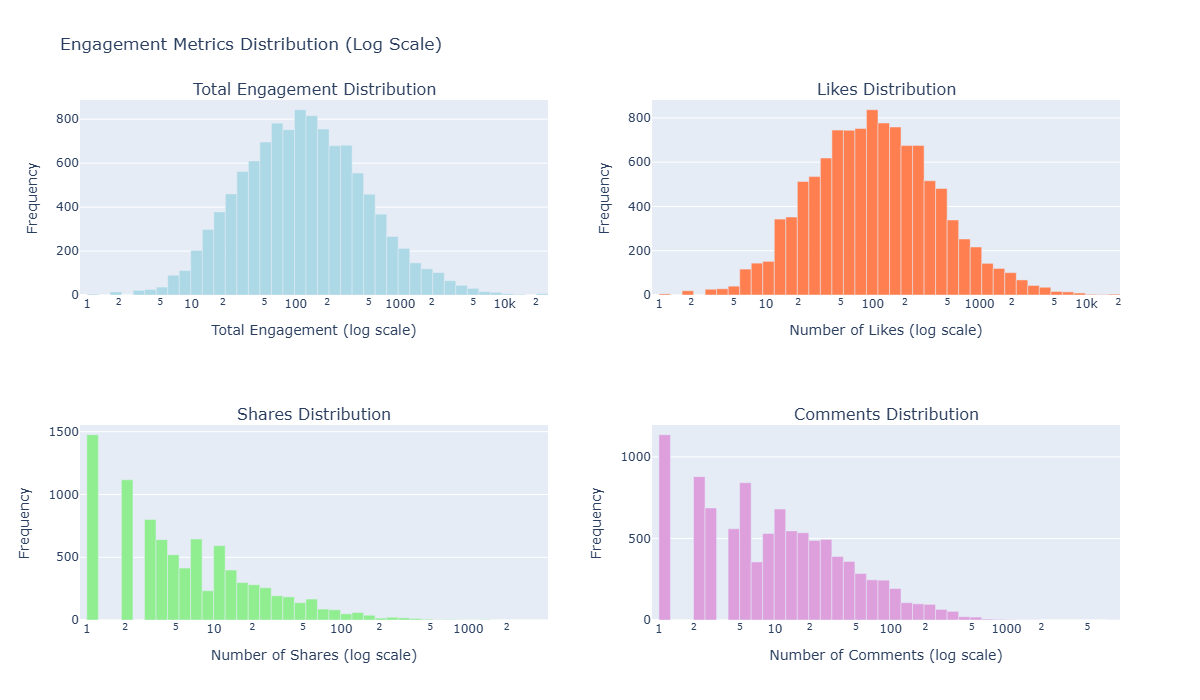

Histograms created with logarithmic binning and proper bar widths
Posts with 0 total engagement excluded: 3


In [126]:
# Engagement distribution visualization - Histograms with log scale
import numpy as np

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Total Engagement Distribution', 'Likes Distribution',
                    'Shares Distribution', 'Comments Distribution')
)

# Function to create histogram with log bins and proper bar widths
def create_log_histogram_trace(data, color, num_bins=40):
    # Remove zeros (can't take log of 0)
    data_nonzero = data[data > 0]

    if len(data_nonzero) == 0:
        return go.Bar(x=[], y=[])

    # Create logarithmic bins
    log_bins = np.logspace(np.log10(data_nonzero.min()),
                           np.log10(data_nonzero.max()),
                           num_bins + 1)

    # Compute histogram
    counts, bin_edges = np.histogram(data_nonzero, bins=log_bins)

    # Use bin edges to create bars that span the full bin width
    # This creates a proper histogram appearance on log scale
    return go.Bar(
        x=bin_edges[:-1],  # Left edge of each bin
        y=counts,
        width=bin_edges[1:] - bin_edges[:-1],  # Actual width of each bin
        marker_color=color,
        offset=0
    )

# Create traces
total_trace = create_log_histogram_trace(df['total_engagement'], 'lightblue')
likes_trace = create_log_histogram_trace(df['numLikes'], 'coral')
shares_trace = create_log_histogram_trace(df['numShares'], 'lightgreen')
comments_trace = create_log_histogram_trace(df['numComments'], 'plum')

# Add traces
fig.add_trace(total_trace, row=1, col=1)
fig.add_trace(likes_trace, row=1, col=2)
fig.add_trace(shares_trace, row=2, col=1)
fig.add_trace(comments_trace, row=2, col=2)

# Update all x-axes to log scale
fig.update_xaxes(type="log", title_text="Total Engagement (log scale)", row=1, col=1)
fig.update_xaxes(type="log", title_text="Number of Likes (log scale)", row=1, col=2)
fig.update_xaxes(type="log", title_text="Number of Shares (log scale)", row=2, col=1)
fig.update_xaxes(type="log", title_text="Number of Comments (log scale)", row=2, col=2)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=2)

fig.update_layout(height=700, showlegend=False, bargap=0,
                  title_text="Engagement Metrics Distribution (Log Scale)")
fig.show()
# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except:
    print('Static image export requires: pip install kaleido')
fig.write_html('../output/figures/report_engagement_distribution.html')
fig.write_image('../output/figures/report_engagement_distribution.png')

print("Histograms created with logarithmic binning and proper bar widths")
print(f"Posts with 0 total engagement excluded: {(df['total_engagement'] == 0).sum()}")

## 3.2 Content Type Breakdown

Engagement by Content Type:
primary_content_type  post_count  total_engagement_mean  total_engagement_median
               Video        1620                 461.22                   194.00
               Image        3970                 444.38                   173.00
           Text Only        1489                 402.11                   168.00
             Article        1625                 248.99                   112.00
            Document          84                 246.20                    80.50
               Event           5                 157.40                    90.00
             Unknown           3                  99.00                   148.00
             Reshare        2405                  58.58                    30.00
                Poll          26                  51.31                    40.50


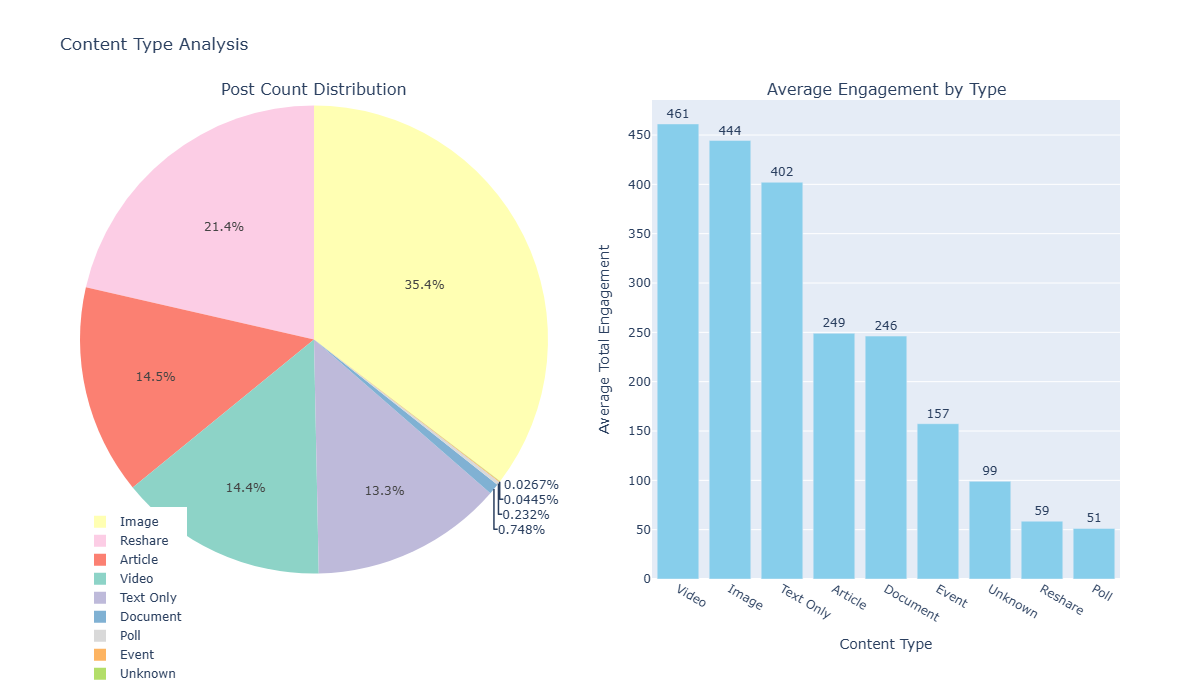

In [127]:
# Content type engagement analysis
content_type_eng = pd.read_csv('../output/tables/engagement_by_content_type.csv')

print("Engagement by Content Type:")
print(content_type_eng[['primary_content_type', 'post_count', 'total_engagement_mean', 'total_engagement_median']].to_string(index=False))

# Visualize
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'bar'}]],
    subplot_titles=('Post Count Distribution', 'Average Engagement by Type')
)

# Pie chart
fig.add_trace(
    go.Pie(labels=content_type_eng['primary_content_type'],
           values=content_type_eng['post_count'],
           marker_colors=px.colors.qualitative.Set3,
           showlegend=True,
           domain=dict(x=[0, 0.45], y=[0.2, 1.0])),  # Leave space below for legend
    row=1, col=1
)

# Bar chart
fig.add_trace(
    go.Bar(x=content_type_eng['primary_content_type'],
           y=content_type_eng['total_engagement_mean'],
           marker_color='skyblue',
           text=content_type_eng['total_engagement_mean'],
           texttemplate='%{text:.0f}',
           textposition='outside',
           showlegend=False),
    row=1, col=2
)

fig.update_layout(
    height=600,  # Increased height to accommodate legend
    title_text="Content Type Analysis",
    legend=dict(
        x=0.0,
        y=0.15,
        xanchor='left',
        yanchor='top',
        orientation='v'
    )
)
fig.update_yaxes(title_text="Average Total Engagement", row=1, col=2)
fig.update_xaxes(title_text="Content Type", row=1, col=2)
fig.show()
# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except:
    print('Static image export requires: pip install kaleido')
fig.write_html('../output/figures/report_content_type_analysis.html')
fig.write_image('../output/figures/report_content_type_analysis.png')

---

# 4. Content Length Analysis

## 4.1 The Length of Text Content in Posts

In [128]:
# Load length analysis data
length_bins = pd.read_csv('../output/tables/engagement_by_length_bins.csv')

print("="*70)
print("POST LENGTH ANALYSIS")
print("="*70)
print("\nEngagement by Length (200-char bins):")
print(length_bins.head(20).to_string(index=False))

# Find optimal range (excluding Empty)
non_empty = length_bins[length_bins['length_bin'] != 'Empty']
if len(non_empty) > 0:
    best_bin = non_empty.loc[non_empty['avg_engagement'].idxmax()]
    print(f"\n🎯 OPTIMAL LENGTH RANGE: {best_bin['length_bin']}")
    print(f"   Average Engagement: {best_bin['avg_engagement']:.0f}")
    print(f"   Median Engagement: {best_bin['median_engagement']:.0f}")
    print(f"   Number of Posts: {best_bin['post_count']:.0f}")

POST LENGTH ANALYSIS

Engagement by Length (200-char bins):
length_bin  avg_engagement  median_engagement  post_count  avg_likes  avg_shares  avg_comments
     0-200          122.41              38.00        2049     110.68        3.73          7.99
   200-400          285.10              89.00        2586     255.38        7.86         21.86
   400-600          302.34             109.50        1592     269.61       11.58         21.14
   600-800          399.58             130.00        1200     353.89       17.68         28.00
  800-1000          290.23             133.00         962     252.49       13.18         24.57
 1000-1200          341.46             182.00         749     296.31       15.70         29.46
 1200-1400          426.58             191.00         561     369.52       20.75         36.31
 1400-1600          687.94             250.00         379     580.27       47.75         59.92
 1600-1800          611.96             230.50         290     528.15       25.75     

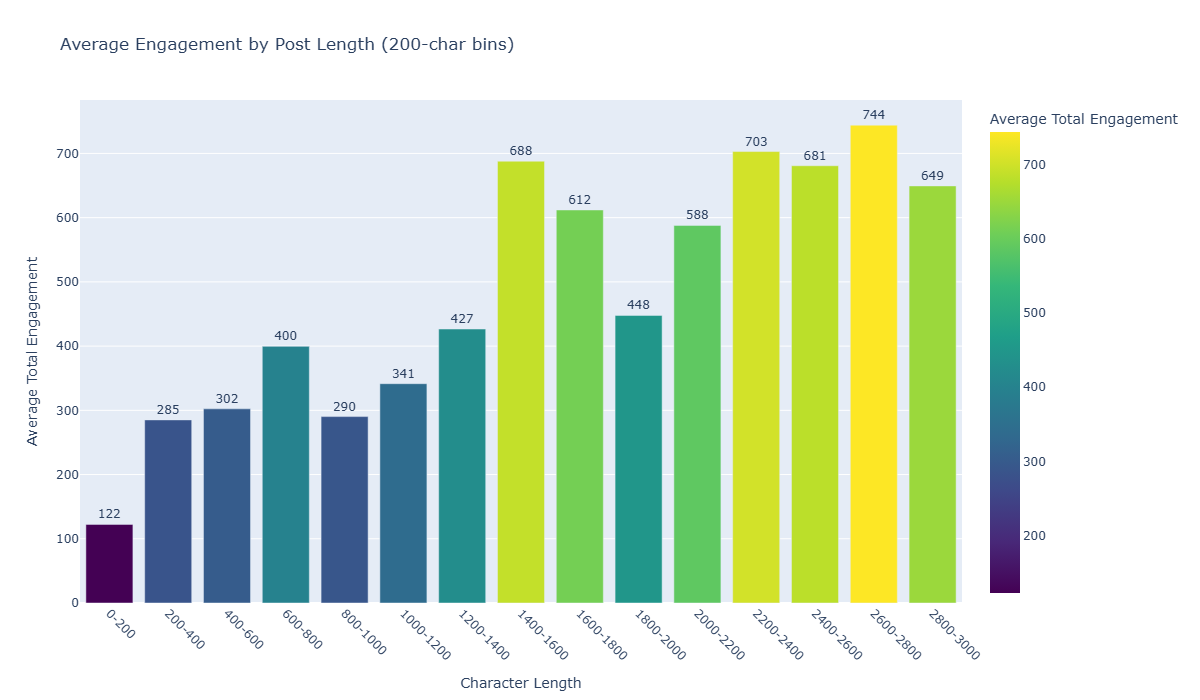

In [129]:
# Visualize length vs engagement
fig = px.bar(
    length_bins[length_bins['length_bin'] != 'Empty'].head(20),
    x='length_bin',
    y='avg_engagement',
    title='Average Engagement by Post Length (200-char bins)',
    labels={'length_bin': 'Character Length', 'avg_engagement': 'Average Total Engagement'},
    text='avg_engagement',
    color='avg_engagement',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(height=600, showlegend=False)
fig.update_xaxes(tickangle=45)
fig.show()
# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except:
    print('Static image export requires: pip install kaleido')
fig.write_html('../output/figures/report_length_analysis.html')
fig.write_image('../output/figures/report_length_analysis.png')

## 4.2 Content Type × Length Interaction

Optimal Length Varies by Content Type:
primary_content_type length_category  avg_engagement  post_count
             Article            Long          266.33         496
             Article          Medium          229.08         559
             Article           Short          153.08         359
             Article       Very Long          530.46         135
             Article      Very Short          144.06          70
               Image            Long          412.49        1213
               Image          Medium          456.38        1304
               Image           Short          360.15         738
               Image       Very Long          627.24         574
               Image      Very Short          301.55         139
             Reshare            Long          126.48         207
             Reshare          Medium           65.63         580
             Reshare           Short           47.58        1000
             Reshare       Very Long          269.4

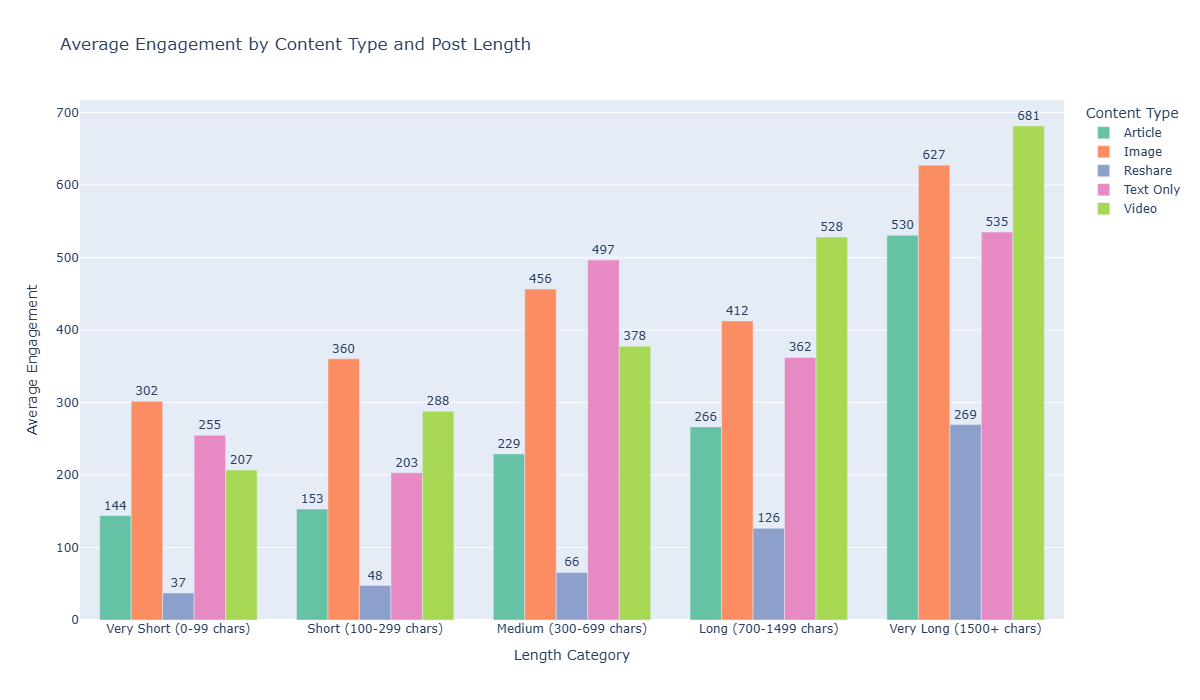


Key Takeaway: Different content types have different optimal lengths
Match your post length to your content type for best results


In [130]:
# Load interaction data
interaction_data = pd.read_csv('../output/tables/content_type_length_interaction.csv')

print("Optimal Length Varies by Content Type:")
print(interaction_data.to_string(index=False))

# Create grouped bar chart
# Define the correct order for length categories with character ranges
length_order = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
length_labels = {
    'Very Short': 'Very Short\n(0-99 chars)',
    'Short': 'Short\n(100-299 chars)',
    'Medium': 'Medium\n(300-699 chars)',
    'Long': 'Long\n(700-1499 chars)',
    'Very Long': 'Very Long\n(1500+ chars)'
}

# Create the plot
fig = go.Figure()

# Get unique content types
content_types = interaction_data['primary_content_type'].unique()
colors = px.colors.qualitative.Set2

# Add a bar for each content type
for idx, content_type in enumerate(content_types):
    data_subset = interaction_data[interaction_data['primary_content_type'] == content_type]

    # Sort by length category in correct order
    data_subset['length_category'] = pd.Categorical(
        data_subset['length_category'],
        categories=length_order,
        ordered=True
    )
    data_subset = data_subset.sort_values('length_category')

    # Map category names to labels with ranges
    x_labels = [length_labels[cat] for cat in data_subset['length_category']]

    fig.add_trace(go.Bar(
        name=content_type,
        x=x_labels,
        y=data_subset['avg_engagement'],
        marker_color=colors[idx % len(colors)],
        text=data_subset['avg_engagement'],
        texttemplate='%{text:.0f}',
        textposition='outside'
    ))

fig.update_layout(
    title_text="Average Engagement by Content Type and Post Length",
    xaxis_title="Length Category",
    yaxis_title="Average Engagement",
    barmode='group',
    height=500,
    legend=dict(title="Content Type"),
    xaxis=dict(categoryorder='array', categoryarray=[length_labels[cat] for cat in length_order])
)

fig.show()
# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except:
    print('Static image export requires: pip install kaleido')
fig.write_html('../output/figures/content_type_length_interaction.html')
fig.write_image('../output/figures/content_type_length_interaction.png')

print("\nKey Takeaway: Different content types have different optimal lengths")
print("Match your post length to your content type for best results")

## 4.4 Recommendations

### ✅ DO:
- **Aim for at least 1,400 characters** for maximum engagement
- Write substantial, well-developed content
- Match length to content type (images can be shorter, articles longer)
- Use paragraph breaks to make longer posts readable

### ❌ DON'T:
- Write very short posts (<200 chars) unless sharing media
- Exceeding 1,400 characters has diminishing returns

---

# 5. Content Features Analysis

Based on analysis of 11,227 posts examining hashtags, emojis, mentions, and URLs.

## 5.1 Hashtags: Less is More

HASHTAG ANALYSIS

Engagement by Hashtag Count:
hashtag_count_bin  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
                0          329.72             115.00        9325     289.59       14.38         25.74
                1          228.61              83.00         555     201.02        9.01         18.59
              2-3          275.33             108.50         410     231.53       12.07         31.73
              4-5          183.37              91.00         317     154.71        8.43         20.23
               6+          493.91             241.50         620     432.67       10.45         50.79

🔑 KEY FINDING:
   Posts WITHOUT hashtags: 330 avg engagement
   Posts WITH hashtags: 318 avg engagement
   Difference: 12 (3.8% better)


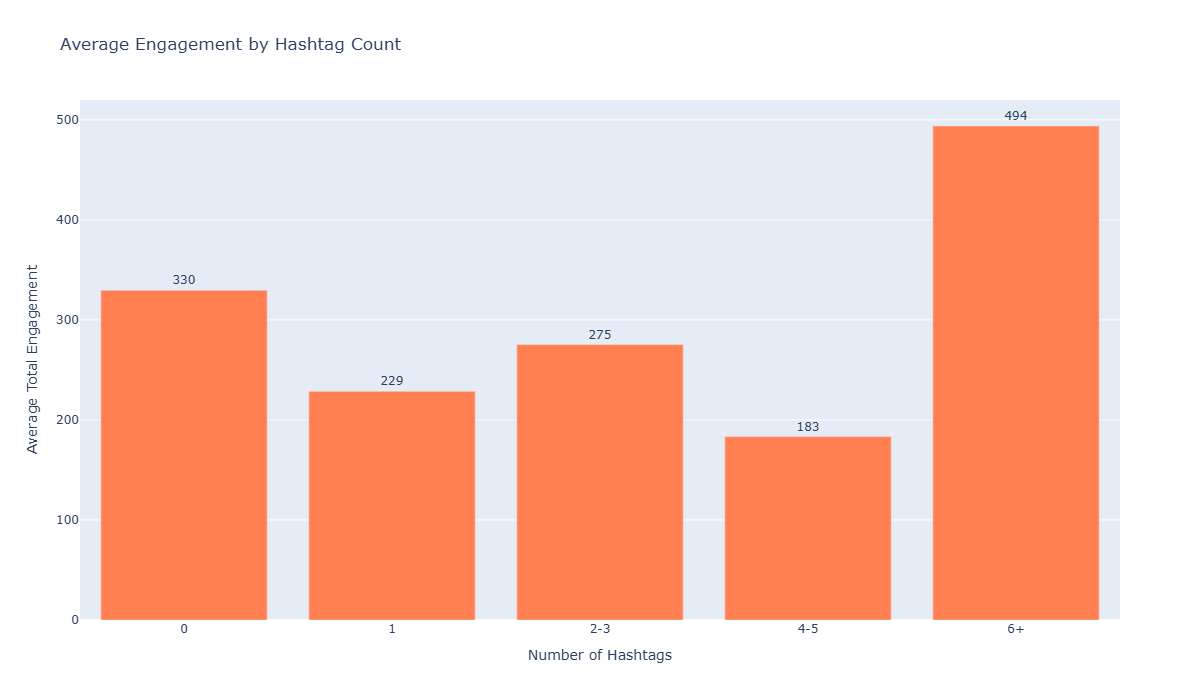


Top 10 Hashtags by Engagement:
        Hashtag  Count  Avg_Engagement
       #funding    366          759.64
  #entrepreneur    335          755.16
     #investing    335          754.40
      #business    336          753.01
       #founder    339          750.29
       #startup    358          732.14
            #vc    386          679.28
#venturecapital    430          668.37
          #seed     39          598.79
             #2     34          532.64


In [131]:
# Load hashtag analysis
hashtag_eng = pd.read_csv('../output/tables/engagement_by_hashtag_count.csv')

print("="*70)
print("HASHTAG ANALYSIS")
print("="*70)
print("\nEngagement by Hashtag Count:")
print(hashtag_eng.to_string(index=False))

# Key finding
no_hashtag_eng = hashtag_eng[hashtag_eng['hashtag_count_bin'] == '0']['Avg_Engagement'].values[0]
with_hashtag_eng = df[df['hashtag_count'] > 0]['total_engagement'].mean()

print(f"\n🔑 KEY FINDING:")
print(f"   Posts WITHOUT hashtags: {no_hashtag_eng:.0f} avg engagement")
print(f"   Posts WITH hashtags: {with_hashtag_eng:.0f} avg engagement")
print(f"   Difference: {no_hashtag_eng - with_hashtag_eng:.0f} ({((no_hashtag_eng/with_hashtag_eng - 1)*100):.1f}% better)")

# Visualize
fig = go.Figure()

fig.add_trace(go.Bar(
    x=hashtag_eng['hashtag_count_bin'],
    y=hashtag_eng['Avg_Engagement'],
    marker_color='coral',
    text=hashtag_eng['Avg_Engagement'],
    texttemplate='%{text:.0f}',
    textposition='outside'
))

fig.update_layout(
    title_text="Average Engagement by Hashtag Count",
    xaxis_title="Number of Hashtags",
    yaxis_title="Average Total Engagement",
    height=500,
    showlegend=False
)

fig.show()
# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except:
    print('Static image export requires: pip install kaleido')
fig.write_html('../output/figures/report_hashtag_engagement.html')
fig.write_image('../output/figures/report_hashtag_engagement.png')

# Top hashtags
top_hashtags = pd.read_csv('../output/tables/top_hashtags_by_engagement.csv')
print("\nTop 10 Hashtags by Engagement:")
print(top_hashtags.head(10)[['Hashtag', 'Count', 'Avg_Engagement']].to_string(index=False))

### Hashtag Recommendations

✅ **DO**:
- Use either 0 hashtags OR 6+ hashtags for maximum engagement
- If using 6+ hashtags, choose relevant, high-performing ones: #funding, #entrepreneur, #investing
- 0 hashtags (330 avg) and 6+ hashtags (494 avg) both outperform moderate usage

❌ **DON'T**:
- Use 1-5 hashtags (significantly reduces engagement to 183-275 avg)
- Use generic or irrelevant hashtags just to reach the 6+ threshold

## 5.2 Emojis: Strategic Use Only

EMOJI ANALYSIS

Engagement by Emoji Count:
emoji_count_bin  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
              0          354.13             117.00        7315     311.74       14.06         28.33
            1-2          251.57              97.00        2447     219.32       10.19         22.06
            3-5          310.55             133.00         841     268.93       16.50         25.13
           6-10          343.30             150.00         399     295.82       18.84         28.64
            11+          331.36             156.00         225     280.11       17.77         33.48

🔑 KEY FINDING:
   Posts WITHOUT emojis: 354 avg engagement
   Posts WITH emojis: 281 avg engagement


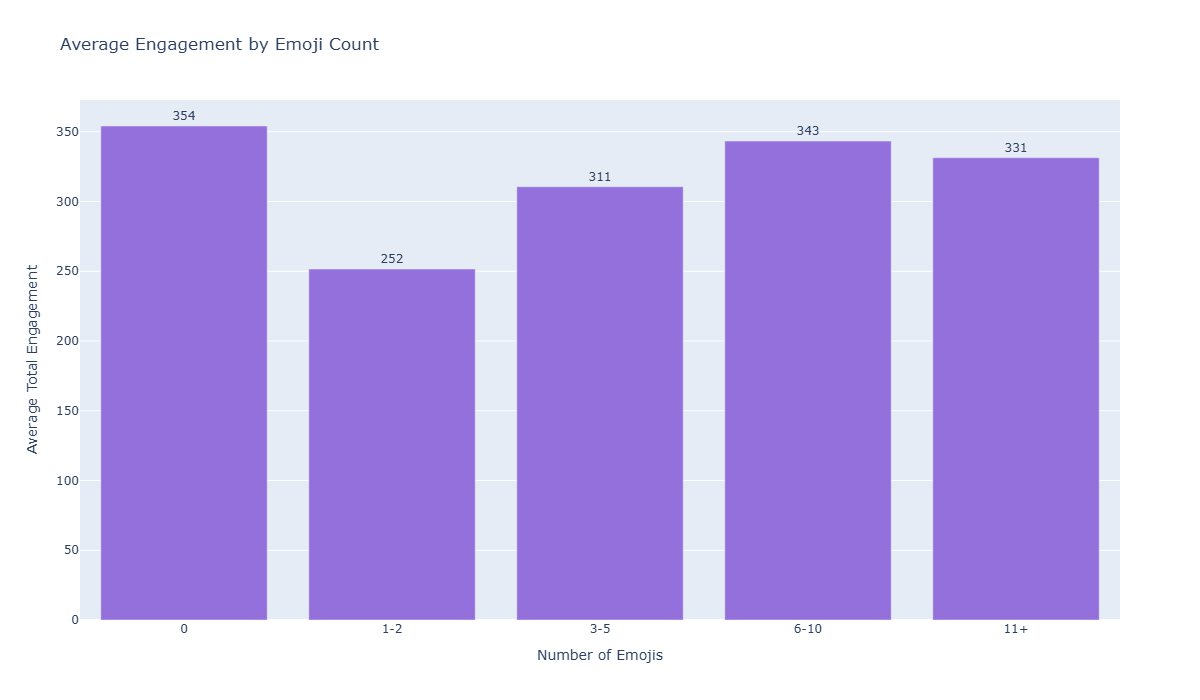


Top 10 Emojis by Engagement:
Emoji  Count  Avg_Engagement
    ⚡    473          617.14
    🌍     68          583.93
    👋    137          566.21
    🧠     72          503.80
   ⬇️     68          496.77
    🤯     77          427.72
    🎮     52          406.88
    🎉    100          378.55
   ❤️    107          368.76
    📣     66          363.08

💡 If using emojis, stick to these high performers!


In [132]:
# Load emoji analysis
emoji_eng = pd.read_csv('../output/tables/engagement_by_emoji_count.csv')

print("="*70)
print("EMOJI ANALYSIS")
print("="*70)
print("\nEngagement by Emoji Count:")
print(emoji_eng.to_string(index=False))

# Key finding
no_emoji_eng = emoji_eng[emoji_eng['emoji_count_bin'] == '0']['Avg_Engagement'].values[0]
with_emoji_eng = df[df['emoji_count'] > 0]['total_engagement'].mean()

print(f"\n🔑 KEY FINDING:")
print(f"   Posts WITHOUT emojis: {no_emoji_eng:.0f} avg engagement")
print(f"   Posts WITH emojis: {with_emoji_eng:.0f} avg engagement")

# Visualize
fig = go.Figure()

fig.add_trace(go.Bar(
    x=emoji_eng['emoji_count_bin'],
    y=emoji_eng['Avg_Engagement'],
    marker_color='mediumpurple',
    text=emoji_eng['Avg_Engagement'],
    texttemplate='%{text:.0f}',
    textposition='outside'
))

fig.update_layout(
    title_text="Average Engagement by Emoji Count",
    xaxis_title="Number of Emojis",
    yaxis_title="Average Total Engagement",
    height=500,
    showlegend=False
)

fig.show()
# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except:
    print('Static image export requires: pip install kaleido')
fig.write_html('../output/figures/report_emoji_engagement.html')
fig.write_image('../output/figures/report_emoji_engagement.png')

# Top emojis
top_emojis = pd.read_csv('../output/tables/top_emojis_by_engagement.csv')
print("\nTop 10 Emojis by Engagement:")
print(top_emojis.head(10)[['Emoji', 'Count', 'Avg_Engagement']].to_string(index=False))
print("\n💡 If using emojis, stick to these high performers!")

### Emoji Recommendations

✅ **DO**:
- Use 0-2 emojis maximum
- Choose high-performing emojis: ⚡ (617 avg), 🌍 (584 avg), 👋 (566 avg)
- Use emojis that add meaning, not decoration

❌ **DON'T**:
- Overuse emojis (11+ significantly reduces engagement)
- Use emoji spam or emoji-only content

## 5.3 Mentions: Strategic Tagging

In [133]:
# Load mention analysis
mention_eng = pd.read_csv('../output/tables/engagement_by_mention_count.csv')
mention_type = pd.read_csv('../output/tables/engagement_by_mention_type.csv')

print("="*70)
print("MENTION ANALYSIS")
print("="*70)
print("\nEngagement by Mention Count:")
print(mention_eng.to_string(index=False))

print("\nEngagement by Mention Type:")
print(mention_type.to_string(index=False))

# Top mentioned
top_people = pd.read_csv('../output/tables/top_mentioned_people.csv')
top_companies = pd.read_csv('../output/tables/top_mentioned_companies.csv')

print("\nTop 10 Most Mentioned People:")
print(top_people.head(10).to_string(index=False))

print("\nTop 10 Most Mentioned Companies:")
print(top_companies.head(10).to_string(index=False))

MENTION ANALYSIS

Engagement by Mention Count:
mention_count_bin  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
                0          410.16             130.00        3754     361.28       16.54         32.34
              1-2          266.49              89.00        3391     232.84       11.09         22.56
              3-5          214.74             101.50        2092     190.78        8.14         15.82
               6+          395.01             163.00        1990     341.38       18.31         35.32

Engagement by Mention Type:
         Mention_Type  Avg_Engagement  Post_Count
          No Mentions          410.16        3754
 Person Mentions Only          269.61        1183
Company Mentions Only          339.06        2106
                 Both          264.33        4184

Top 10 Most Mentioned People:
           Person  Mention_Count
     Jordan Mazer            154
    Jordan Carver            146
      Guru Chahal            134
 

### Mention Recommendations

✅ **DO**:
- Use either 0 mentions (410 avg) OR 6+ mentions (395 avg) for best engagement
- If using mentions, tag relevant influencers and portfolio companies
- Go comprehensive with 6+ mentions when appropriate

❌ **DON'T**:
- Use 1-2 mentions (266 avg) or 3-5 mentions (215 avg) - the "dead zone"
- Tag people/companies not relevant to content

# 6. Text Quality & Structure

## 6.1 Questions & CTAs

In [134]:
# Load question/CTA analysis
import os
question_eng = pd.read_csv('../output/tables/engagement_by_question_posts.csv')
cta_eng = pd.read_csv('../output/tables/engagement_by_cta_posts.csv')

print("="*70)
print("QUESTIONS & CALL-TO-ACTION ANALYSIS")
print("="*70)

print("\nEngagement by Question Posts:")
print(question_eng.to_string(index=False))

print("\nEngagement by CTA Posts:")
print(cta_eng.to_string(index=False))

print("\n💡 Questions and CTAs encourage interaction!")

QUESTIONS & CALL-TO-ACTION ANALYSIS

Engagement by Question Posts:
 has_question  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
        False          324.14             110.00        9078     286.25       13.24         24.65
         True          342.58             136.00        2149     291.16       15.36         36.07

Engagement by CTA Posts:
 has_any_cta  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
       False          315.21             110.00        8521     280.33       11.31         23.57
        True          366.88             136.00        2706     308.78       20.99         37.12

💡 Questions and CTAs encourage interaction!


## 6.2 Post Structure

In [135]:
# Load structure analysis
structure_eng = pd.read_csv('../output/tables/engagement_by_structure.csv')

print("="*70)
print("POST STRUCTURE ANALYSIS")
print("="*70)
print("\nEngagement by Post Structure:")
print(structure_eng.to_string(index=False))

# Find best structure (excluding Empty)
non_empty = structure_eng[structure_eng.index != 'Empty']
if len(non_empty) > 0:
    best_idx = non_empty['Avg_Engagement'].idxmax()
    best_structure = non_empty.loc[best_idx]
    print(f"\n🎯 BEST STRUCTURE: {best_idx}")
    print(f"   Average Engagement: {best_structure['Avg_Engagement']:.0f}")

POST STRUCTURE ANALYSIS

Engagement by Post Structure:
structure_type  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
         Empty          655.64              37.00          14     588.64       13.86         53.14
  Single Block          122.14              42.00        2321     110.10        3.98          8.07
2-3 Paragraphs          267.60              92.00        3002     236.17       11.33         20.09
4-5 Paragraphs          393.73             149.00        2654     352.47       15.46         25.79
 6+ Paragraphs          475.20             209.00        3236     406.68       21.23         47.29

🎯 BEST STRUCTURE: 0
   Average Engagement: 656


## 6.3 Content Categories (LLM Analysis)

**Note**: Based on 100-post stratified sample classified with LLM (llama3.3-70b-instruct)

In [136]:
# Load LLM classification results
import os
if os.path.exists('../output/tables/engagement_by_content_category_sample.csv'):
    category_eng = pd.read_csv('../output/tables/engagement_by_content_category_sample.csv')

    print("="*70)
    print("CONTENT CATEGORY ANALYSIS (100-post LLM sample)")
    print("="*70)
    print("\nEngagement by Content Category:")
    print(category_eng.to_string(index=False))

else:
    print("LLM classification results not available")
    print("Run section 6.3 in Notebook 04 to generate classifications")

CONTENT CATEGORY ANALYSIS (100-post LLM sample)

Engagement by Content Category:
                        llm_category  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
              Personal Story/Journey         1767.50            1767.50           2    1579.00       29.50        159.00
        Product/Company Announcement          381.57              70.00           7     312.43       31.86         37.29
               Achievement/Milestone          348.17             151.00          12     299.83       10.00         38.33
Industry Analysis/Thought Leadership          322.80             161.00          35     288.00        9.11         25.69
                  Hiring/Job Posting          246.75             238.50           4     206.25       20.75         19.75
       Event Announcement/Invitation          202.89             111.00           9     170.33        6.78         25.78
           Content Promotion/Sharing          153.65              76.00 

### Content Category Recommendations

**Note**: Based on 100-post LLM-classified sample

✅ **High-Performing Categories**:
- **Personal Story/Journey** (1,768 avg) - Share authentic experiences and lessons learned
- **Product/Company Announcements** (382 avg) - Major launches and updates generate interest
- **Achievements/Milestones** (348 avg) - Celebrate wins and progress
- **Industry Analysis/Thought Leadership** (323 avg) - Share insights and perspectives

❌ **Lower-Performing Categories**:
- **Portfolio Company/Investment News** (102 avg) - Less engaging for general audience
- **Content Promotion/Sharing** (154 avg) - Pure promotion underperforms

**Key Insight**: Personal stories vastly outperform promotional content. Lead with value and authenticity.

## 6.4 Writing Style & Tone

In [137]:
# Load writing style analysis
style_eng = pd.read_csv('../output/tables/engagement_by_writing_style.csv')
readability_eng = pd.read_csv('../output/tables/engagement_by_readability.csv')
sentiment_eng = pd.read_csv('../output/tables/engagement_by_sentiment.csv')

print("="*70)
print("WRITING STYLE & TONE ANALYSIS")
print("="*70)

print("\nEngagement by Writing Style:")
print(style_eng.to_string(index=False))

print("\nEngagement by Readability:")
print(readability_eng.to_string(index=False))

print("\nEngagement by Sentiment:")
print(sentiment_eng.to_string(index=False))

print("\n💡 Key insights:")
print("   • Writing style impacts engagement")
print("   • Readability matters - don't be too complex")
print("   • Slight positive sentiment performs best")

WRITING STYLE & TONE ANALYSIS

Engagement by Writing Style:
      writing_style  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
Collective (We/Our)          527.85             213.00        1905     458.32       24.41         45.13
    Personal (I/My)          495.02             208.00        1383     425.38       19.55         50.10
  Direct (You/Your)          385.82             134.00         701     330.17       18.47         37.19
 Neutral/Impersonal          237.78              83.00        7179     211.93        9.26         16.60

Engagement by Readability:
readability_category  Avg_Engagement  Median_Engagement  Post_Count  Avg_Likes  Avg_Shares  Avg_Comments
           Very Easy          232.77              79.00         449     208.42        6.09         18.26
                Easy          341.27             130.00        3400     297.88       10.84         32.55
    Fairly Difficult          380.25             126.50        2686     332.3

---

# 7. Temporal Patterns

⚠️ **Important Limitation**: All timestamps are in UTC. Time-of-day analysis may not reflect individual users' local times.

## 7.1 Time of Day Analysis (UTC)

In [138]:
# Load temporal analysis
time_of_day = pd.read_csv('../output/tables/engagement_by_time_of_day.csv')

print("="*70)
print("TEMPORAL PATTERNS (UTC)")
print("="*70)
print("\nEngagement by Time of Day (UTC):")
print(time_of_day.to_string(index=False))

print("\n⚠️ LIMITATION: All times are in UTC")
print("Individual poster/viewer timezones are not available in the data")
print("Patterns may not reflect optimal local posting times")

TEMPORAL PATTERNS (UTC)

Engagement by Time of Day (UTC):
    time_of_day  post_count  avg_engagement  median_engagement  total_engagement
Afternoon (UTC)        5258          325.71             127.00           1712580
  Evening (UTC)        2736          312.31              98.00            854468
  Morning (UTC)         955          370.76             124.00            354075
    Night (UTC)        2278          332.57             107.50            757596

⚠️ LIMITATION: All times are in UTC
Individual poster/viewer timezones are not available in the data
Patterns may not reflect optimal local posting times


---

# 8. Author & Follower Impact

⚠️ **Important Limitation**: Follower count data available for only 10.2% of posts

## 8.1 Follower Count Analysis

In [139]:
# Load follower analysis
import os
if os.path.exists('../output/tables/engagement_by_follower_tier.csv'):
    follower_eng = pd.read_csv('../output/tables/engagement_by_follower_tier.csv')

    print("="*70)
    print("FOLLOWER COUNT ANALYSIS")
    print("="*70)
    print("\nEngagement by Follower Tier:")
    print(follower_eng.to_string(index=False))

    print("\n⚠️ DATA LIMITATION:")
    print(f"   Follower count available for only 10.2% of posts")
    print(f"   Analysis limited by missing data")
else:
    print("Follower tier analysis not available")
    print("89.8% of posts are missing follower count data")

FOLLOWER COUNT ANALYSIS

Engagement by Follower Tier:
follower_tier  Avg_Engagement  Median_Engagement  Post_Count  Avg_Eng_Per_Follower  Median_Eng_Per_Follower  Avg_Followers
         <10K           82.02              52.00         333                  0.04                     0.01        4657.34
     10K-100K          273.80             116.00         445                  0.01                     0.00       37060.27
      100K-1M          917.39             177.00         314                  0.00                     0.00      310182.23
          >1M         2599.48            1112.50          54                  0.00                     0.00     3305171.04

⚠️ DATA LIMITATION:
   Follower count available for only 10.2% of posts
   Analysis limited by missing data


---

# 9. Actionable Recommendations

Based on analysis of 11,227 posts across all engagement metrics.

## 9.1 Content Strategy Framework

### ✅ DO: Proven High-Impact Strategies

**Post Length & Structure**
- Target **1,400-3,000 characters** for optimal engagement (744 avg at 2,600-2,800 range)
- Structure posts with **4-6+ paragraphs** (394-475 avg) vs single blocks (122 avg)
- Match length to content type:
  - Videos: 500-1,000 characters
  - Images: 1,000-1,500 characters  
  - Articles: 2,000-3,000 characters
  - Text-only: 2,600-2,800 characters

**Hashtags: The Binary Choice**
- Use **0 hashtags (330 avg) OR 6+ hashtags (494 avg)**
- AVOID the 1-5 hashtag "dead zone" (183-275 avg)
- If using 6+, choose high-performers (if relevant): #funding (760 avg), #entrepreneur (755 avg), #investing (754 avg)

**Emojis: Less is More**
- Best strategy: **0 emojis (354 avg)**
- If using emojis: stick to 1-2 high-performers only
- Top performers: ⚡ (617 avg), 🌍 (584 avg), 👋 (566 avg)
- Avoid 1-2 random emojis (252 avg)

**Mentions: All or Nothing**
- Use **0 mentions (410 avg) OR 6+ mentions (395 avg)**
- AVOID the 1-5 mention "dead zone" (215-267 avg)
- When using 6+, tag relevant influencers, portfolio companies, and partners

**Questions & CTAs**
- Include **questions** to boost engagement (343 avg vs 324 without)
- Add **calls-to-action** for even better results (367 avg vs 315 without)
- Questions increase comments by ~46%

**Writing Style & Tone**
- Use **Collective "We/Our" (528 avg)** or **Personal "I/My" (495 avg)** style
- Avoid neutral/impersonal tone (238 avg)
- Target **"Easy" to "Fairly Difficult" readability** (341-380 avg)
- Use **positive sentiment** (385 avg) over neutral (303 avg)

**Content Categories**
- Lead with **Personal Stories/Journey (1,768 avg)** - authentic narratives
- **Product/Company Announcements (382 avg)** - major launches work well
- **Industry Analysis/Thought Leadership (323 avg)** - share insights



### ❌ DON'T: Common Engagement Killers

**Post Structure Mistakes**
- Don't write single-block posts without paragraph breaks (122 avg)
- Don't write very short posts (<200 chars) without media (122 avg)

**Hashtag Mistakes**
- Don't use 1-5 hashtags (183-275 avg) - the "dead zone"

**Emoji Mistakes**
- Don't overuse emojis
- Don't use low-performing emojis just for decoration

**Mention Mistakes**
- Don't use 1-5 mentions (215-267 avg) - another "dead zone"

**Content Mistakes**
- Don't write neutral/impersonal content (238 avg)
- Avoid pure promotional content (154 avg) and portfolio news (102 avg)

---


# 10. Limitations & Future Analysis

## 10.1 Data Limitations

### Missing Data
- **89.8% missing follower count data** → Limited analysis of author influence
- **10.2% missing author headlines** → Limited industry-specific insights
- **No individual timezone information** → Temporal analysis in UTC only

### Temporal Scope
- Dataset covers full year of posts
- Single snapshot in time (not longitudinal)
- Cannot track same authors over time

### LLM Classification
- Only 100 posts classified (proof of concept)
- Classification quality depends on LLM performance

## 10.2 Suggested Future Analysis

### With Additional Data:
1. **Industry-Specific Analysis**
   - If author headline data improved
   - Engagement patterns by industry vertical
   - Industry-specific recommendations

2. **Temporal Deep Dive**
   - With user timezone data
   - Optimal posting times by user location
   - Time-decay patterns

3. **Author Longitudinal Study**
   - Track same authors over time
   - Learning curves and improvement
   - Consistency vs. viral posts

### Extended Analysis:
4. **Full LLM Classification**
   - Classify all 11,227 posts
   - More robust category insights
   - Topic modeling and trends

5. **A/B Testing Framework**
   - Test recommendations experimentally
   - Measure actual impact
   - Refine guidelines

6. **Competitive Benchmarking**
   - Compare across industries
   - Identify best-in-class performers
   - Learn from top 1% strategies

---

# 11. Appendices


## A. Data Dictionary

### Core Fields:
- **urn**: Unique post identifier
- **postedAt**: Timestamp (UTC) of post publication
- **text**: Post text content
- **numLikes**: Number of likes received
- **numShares**: Number of shares/reposts
- **numComments**: Number of comments

### Derived Metrics:
- **total_engagement** = numLikes + numShares + numComments
- **engagement_score** = numLikes + (numComments × 2) + (numShares × 3)
- **text_length**: Character count of post text
- **primary_content_type**: Image, Video, Article, Text Only, Reshare, etc.

### Content Features:
- **num_hashtags**: Count of hashtags in text
- **num_emojis**: Count of emojis in text
- **total_mentions**: Count of person + company mentions
- **url_count**: Number of URLs in text

### Temporal Features (UTC):
- **post_hour**: Hour of day (0-23) in UTC
- **post_day**: Day of week
- **time_of_day**: Morning/Afternoon/Evening/Night (UTC)

### Text Analysis:
- **has_question**: Boolean - contains "?"
- **has_any_cta**: Boolean - contains call-to-action
- **structure_type**: Paragraph count category
- **writing_style**: Personal/Collective/Direct/Neutral
- **readability_score**: Flesch Reading Ease (0-100)
- **sentiment_score**: Polarity (-1 to 1)

## B. Visualizations Index

### Interactive Visualizations Created (50+ total):

**Engagement Analysis:**
- engagement_distribution.html
- engagement_by_content_type.html
- correlation_heatmap.html

**Length Analysis:**
- length_vs_engagement.html
- engagement_by_length_bins.html
- content_type_length_heatmap.html

**Content Features:**
- engagement_by_hashtag_count.html
- top_hashtags_by_engagement.html
- engagement_by_emoji_count.html
- top_emojis_by_engagement.html
- engagement_by_mention_count.html
- engagement_by_mention_type.html
- top_mentioned_people.html
- top_mentioned_companies.html
- engagement_by_url_category.html

**Text Quality:**
- engagement_by_question_posts.html
- engagement_by_structure.html
- content_category_analysis_sample.html
- wordclouds_by_category.png
- engagement_by_readability.html
- engagement_by_writing_style.html
- engagement_by_sentiment.html

**Report Visualizations:**
- report_engagement_distribution.html
- report_content_type_analysis.html
- report_length_analysis.html

All visualizations are interactive (Plotly) and saved in `/output/figures/`